In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
df=pd.read_csv("births (1).csv")
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
quartiles=np.percentile(df["births"],[25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [4]:
mean,sigma=quartiles[1],0.74*(quartiles[2]-quartiles[0])
mean

np.float64(4814.0)

In [5]:
sigma

np.float64(689.31)

In [6]:
df.isnull().sum()
df["day"].fillna(0,inplace=True)  #fillna creates floats (NaN is float), so after replacing NaN with 0, the column is still float64.
df["day"]=df["day"].astype(int)
print(df.isnull().sum())

year      0
month     0
day       0
gender    0
births    0
dtype: int64


/var/folders/dt/kw_3vlx50xng030cvztnn88c0000gn/T/ipykernel_33772/1178904624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["day"].fillna(0,inplace=True)  #fillna creates floats (NaN is float), so after replacing NaN with 0, the column is still float64.


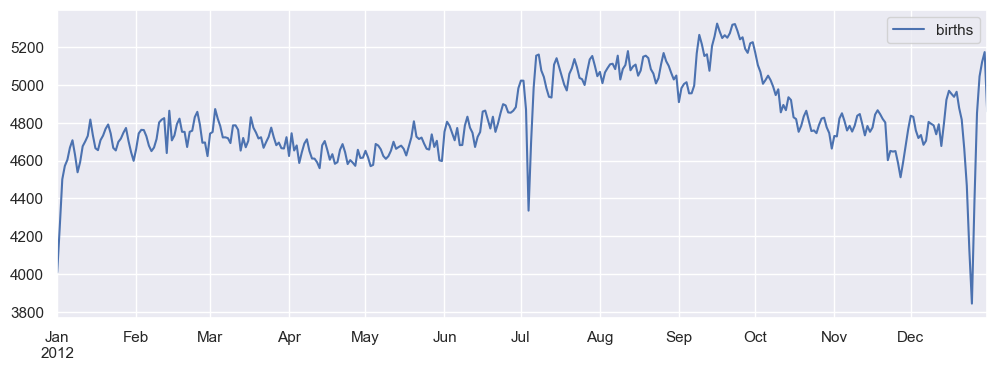

In [7]:
df=df.query("(births>@mean - 5* @sigma)&(births<@mean + 5* @sigma)")
df.index=pd.to_datetime(10000*df.year+100*df.month+df.day,format="%Y%m%d")
birthsDate=df.pivot_table(values="births",index=[df.index.month,df.index.day],aggfunc="mean")
birthsDate.index=[pd.Timestamp(2012,month,day) for (month,day) in birthsDate.index]
fig,ax=plt.subplots(figsize=(12,4))
birthsDate.plot(ax=ax)
plt.show()

In [8]:
print(birthsDate.head())
print(birthsDate.index)
print(birthsDate.dtypes)

              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625
DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=366, freq=None)
births    float64
dtype: object


In [9]:
df.shape

(14610, 5)

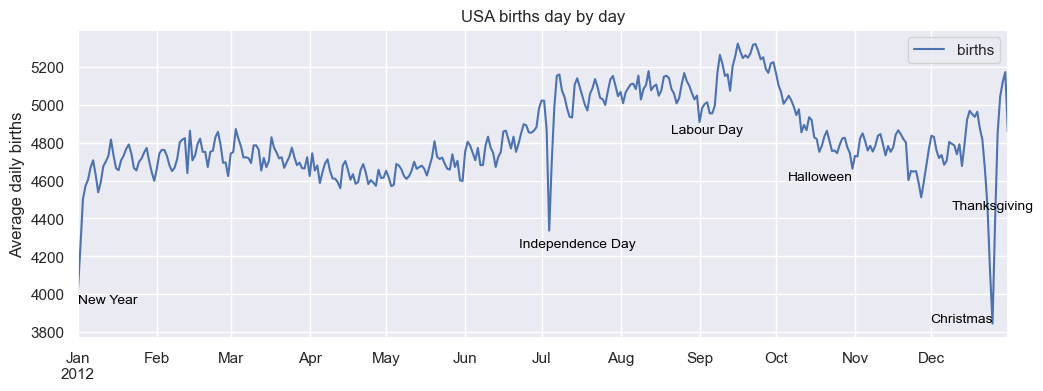

In [10]:
fig,ax=plt.subplots(figsize=(12,4))
birthsDate.plot(ax=ax)
style=dict(size=10,color="black")
ax.text(pd.Timestamp("2012-01-01"), 3950, "New Year", **style)
ax.text(pd.Timestamp("2012-07-15"), 4250, "Independence Day", ha="center", **style)
ax.text(pd.Timestamp("2012-9-4"), 4850, "Labour Day", ha="center", **style)
ax.text(pd.Timestamp("2012-10-31"), 4600, "Halloween", ha="right", **style)
ax.text(pd.Timestamp("2012-12-25"), 4450, "Thanksgiving", ha="center", **style)
ax.text(pd.Timestamp("2012-12-25"), 3850, "Christmas", ha="right", **style)
ax.set(title="USA births day by day",ylabel="Average daily births")
plt.show()